
**Project**: Household Classification - Predicting Number of Children  
**Author**: Jihen LITIM  
**Date**: November 2025
___




Ce mini-projet vise à reproduire une démarche professionnelle complète en data science, allant de la préparation des données à la mise en œuvre de modèles de machine learning supervisé.

le jeu de données Adult Income provenant du **UCI Machine Learning
Repository.**

**Lien officiel du dataset** [ici](https://archive.ics.uci.edu/dataset/2/adult)

Fichier à utiliser obligatoirement :
• adult.data

Les autres fichiers (adult.test, adult.names, etc.) sont fournis à titre informatif et **ne doivent pas être utilisés comme données dans ce projet.**

### Description du jeu de données

Ce jeu de données contient :

- des **variables numériques**,
- des **variables catégorielles nominales et ordinales**,
- des **valeurs manquantes**,
- une **variable cible binaire** indiquant le niveau de revenu (<=50K ou >50K).

Les données sont en **anglais**, ce qui est volontaire et conforme aux pratiques professionnelles internationales.

En revanche, **toutes les analyses et interprétations doivent être rédigées en français.**


### 1) Chargement et compréhension des données
___

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


- #### Chargement du fichier adult.data dans un DataFrame.
---

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

df = pd.read_csv('adult.data', header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


- #### Ajout des noms de colonnes appropriés.
---

In [7]:


df.columns = ["age", "workclass", "fnlwgt","education", "education_num", "marital_status",
              "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
              "hours_per_week", "native_country", "income"]
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


- #### Décrire brièvement le jeu de données (nombre d’observations, variables, types).
---

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


***Le jeu de données Adult représente une population composée d’adultes. Il contient 32 561 observations (allant de 0 à 32 560). Pour chaque adulte, nous avons collecté des informations sur différents aspects démographiques, professionnels et économiques :***

- age : âge de l’individu – variable continue
- workclass : statut professionnel – variable nominale
- fnlwgt : poids utilisé pour estimer la population totale dans le recensement – variable discrète
- education : niveau d’études – variable nominale
- education_num : encodage numérique du niveau d’éducation – variable discrète
- marital_status : situation matrimoniale – variable nominale
- occupation : profession de l’individu – variable nominale
- relationship : relation familiale principale ou type de ménage – variable nominale
- race : origine ethnique – variable nominale
- sex : sexe – variable binaire (Male / Female)
- capital_gain : gain en capital sur investissements – variable continue
- capital_loss : perte en capital sur investissements – variable continue
- hours_per_week : nombre d’heures travaillées par semaine – variable discrète
- native_country : pays de naissance – variable nominale
- income : revenu annuel – variable binaire (<=50K ou >50K)

**En résumé, le dataset contient 6 variables numériques (age, fnlwgt, education_num, capital_gain, capital_loss, hours_per_week) et 9 variables catégoriques (workclass, education, marital_status, occupation, relationship, race, sex, native_country, income).**

**La variable education_num est un encodage numérique de la variable education.**

**Les variables marital_status et relationship sont liées et indiquent des informations proches sur la situation familiale de l’individu.**

- #### Identification de la variable cible et des variables explicatives.
---

In [9]:
# La variable cible est "income" (revenu supérieur ou inférieur à 50K).
y = df['income']
X = df.drop('income', axis=1)

### 2) Analyse exploratoire des données (EDA)
___

- #### Calcule des statistiques descriptives (moyenne, médiane, distributions).
---

In [14]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


- #### Visualisation de la distribution de certaines variables numériques.
---

In [23]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols


['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [25]:
df_cat = df[cat_cols].copy()
df_cat.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [24]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
num_cols

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [26]:
df_num = df[num_cols].copy()
df_num.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


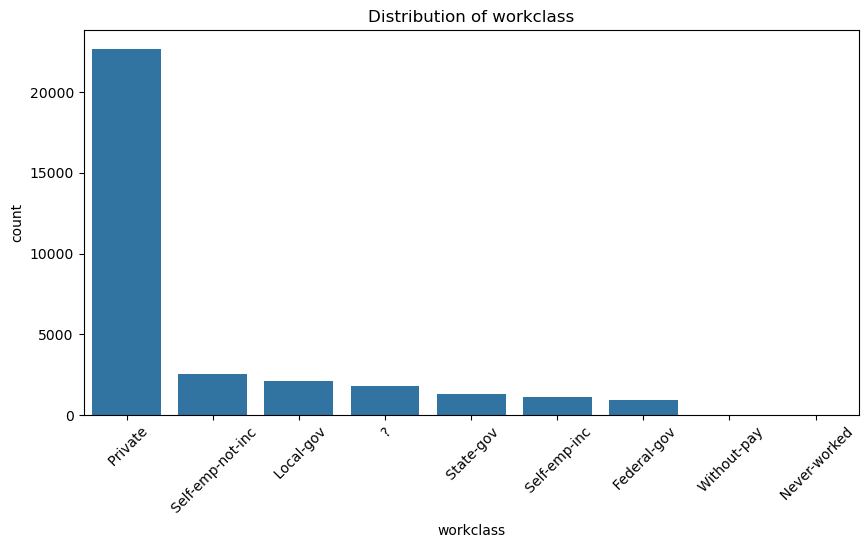

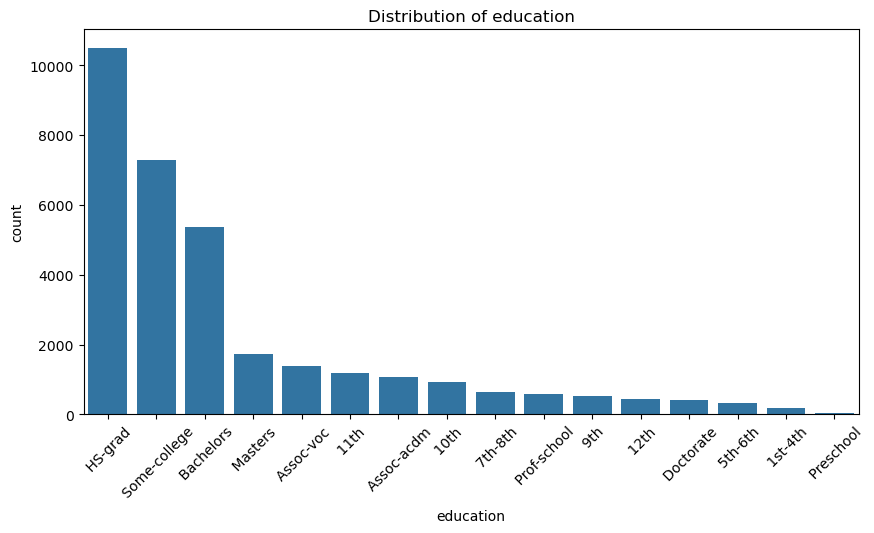

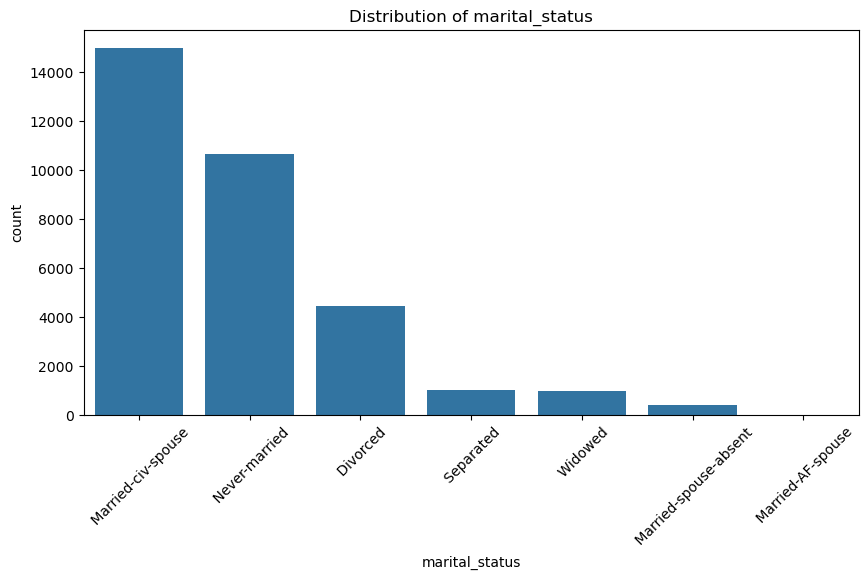

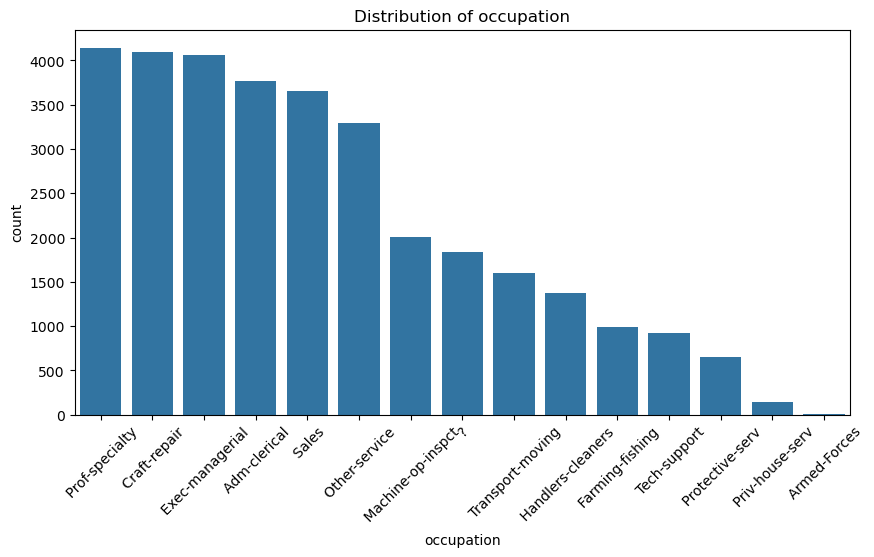

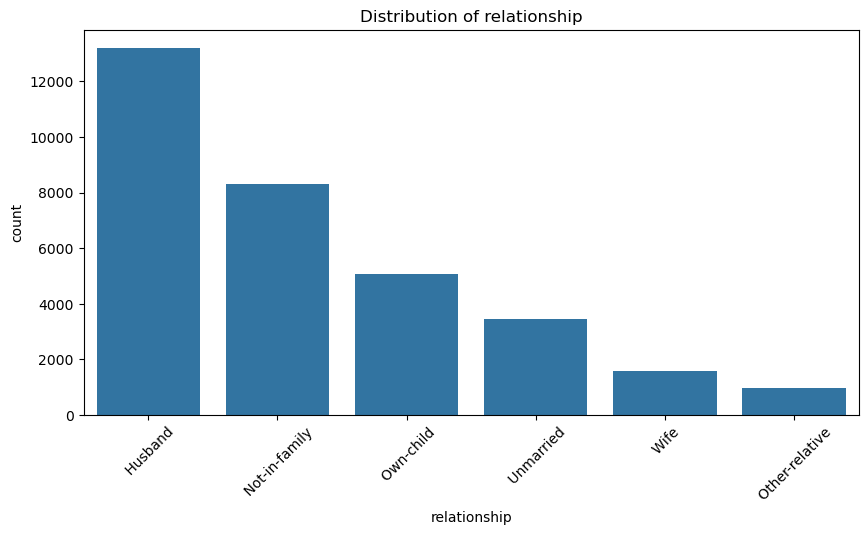

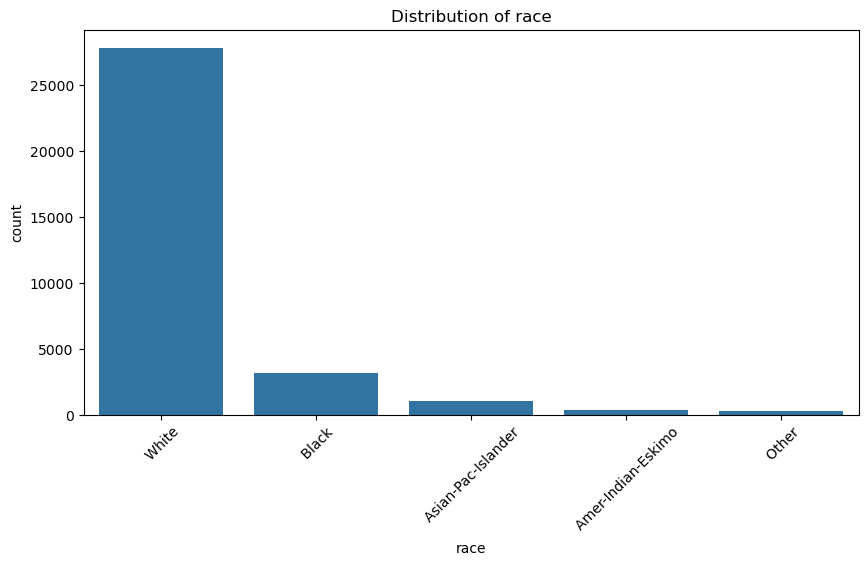

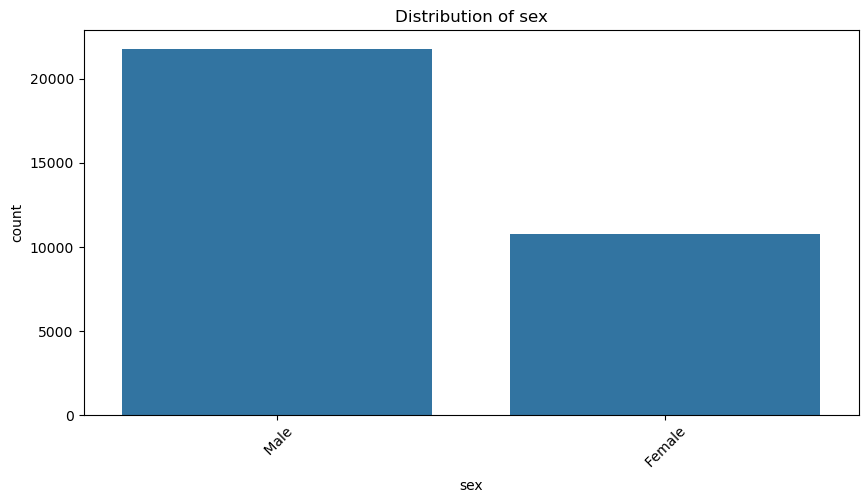

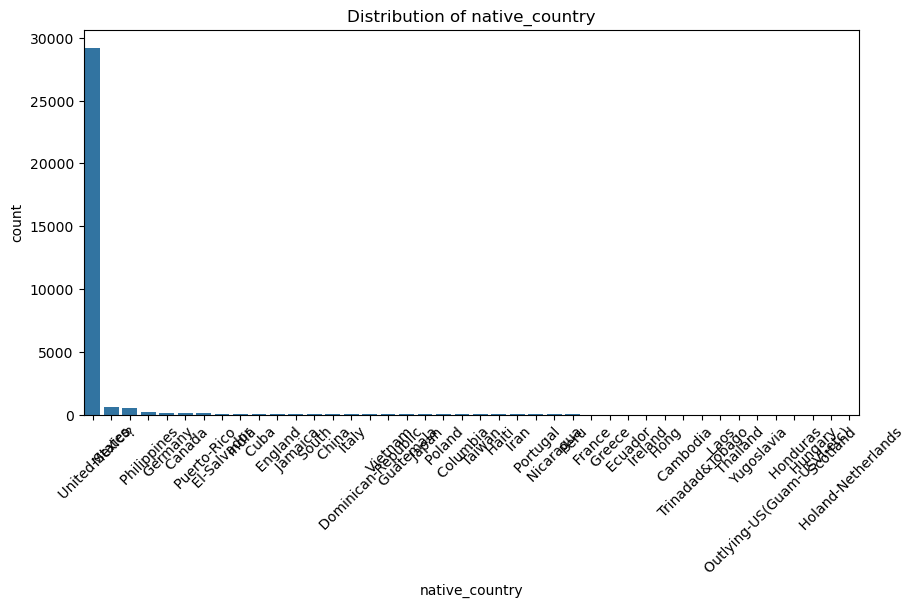

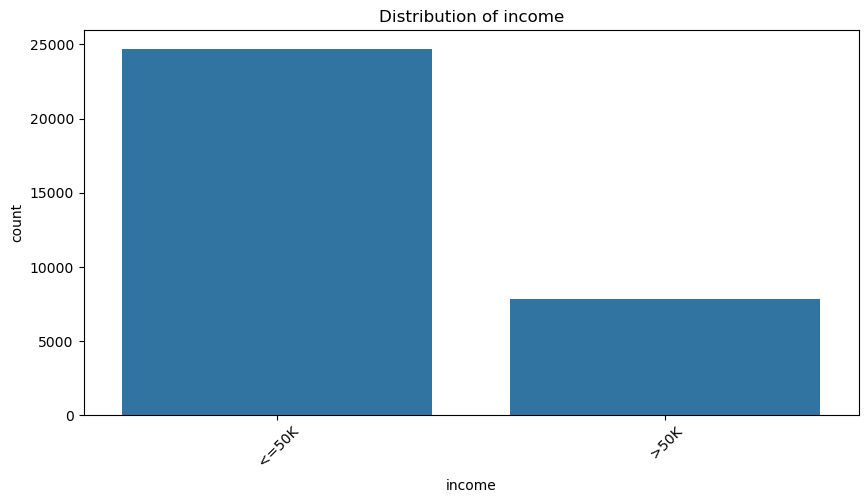

In [27]:
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_cat, x=col, order=df_cat[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

- #### Analyser la répartition de quelques variables catégorielles.
- #### Mettre en évidence d’éventuels déséquilibres de classes.
---
La distribution des revenus montre que les individus gagnant moins de 50 000 $ par an sont largement majoritaires, avec environ 24 000 observations, contre près de 7 500 observations pour ceux dont le revenu annuel est supérieur à 50 000.

La population active est majoritairement masculine, avec une distribution d’environ 25 000 hommes, contre un peu plus de 9 000 femmes.

La répartition des individus selon l’origine ethnique met en évidence un fort déséquilibre : la catégorie `White` est largement dominante avec plus de 29 000 observations, suivie par la catégorie `Black` avec environ 3 000 observations.

Le secteur privé (`Private`) concentre la majorité des emplois, avec près de 25 000 observations, tandis que le reste de la population active se répartit principalement entre le secteur public et le travail indépendant.

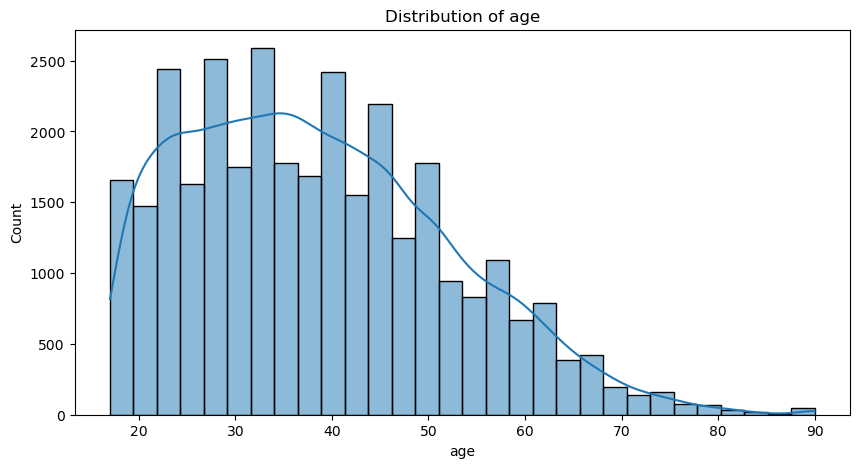

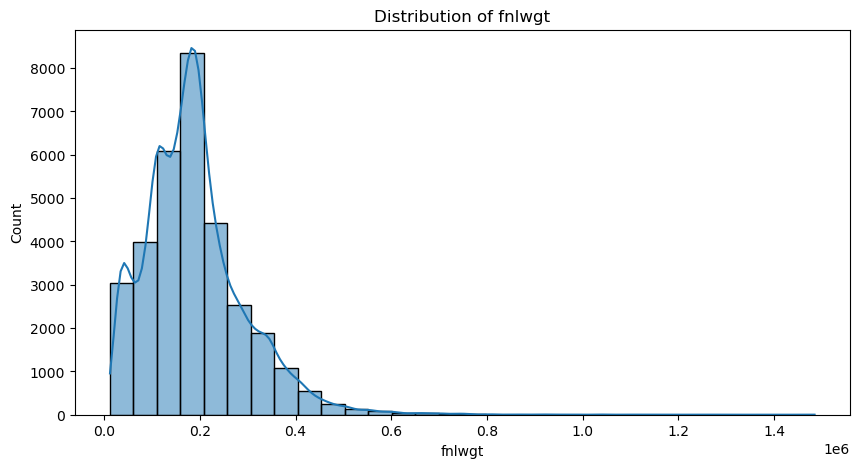

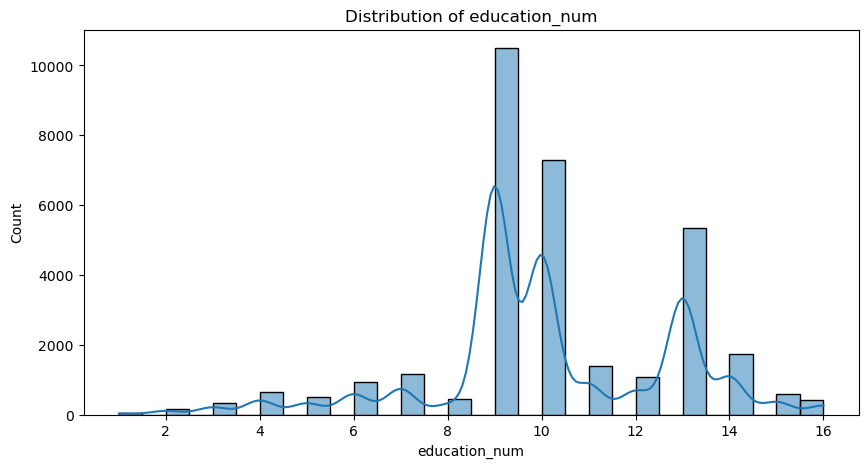

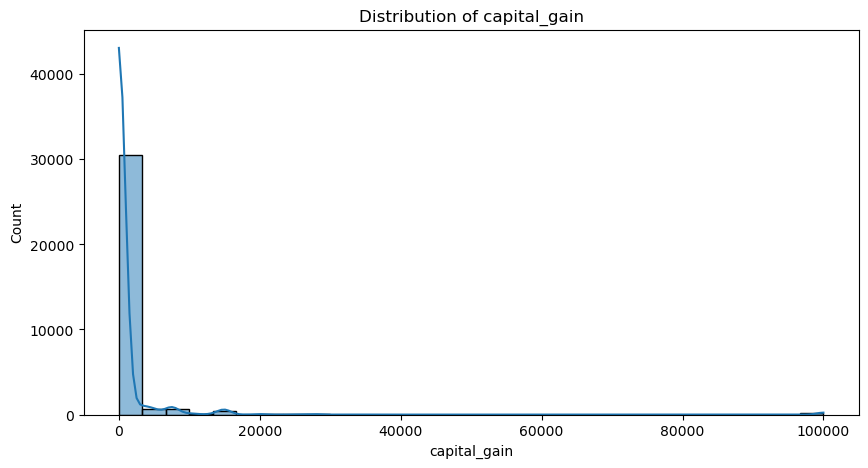

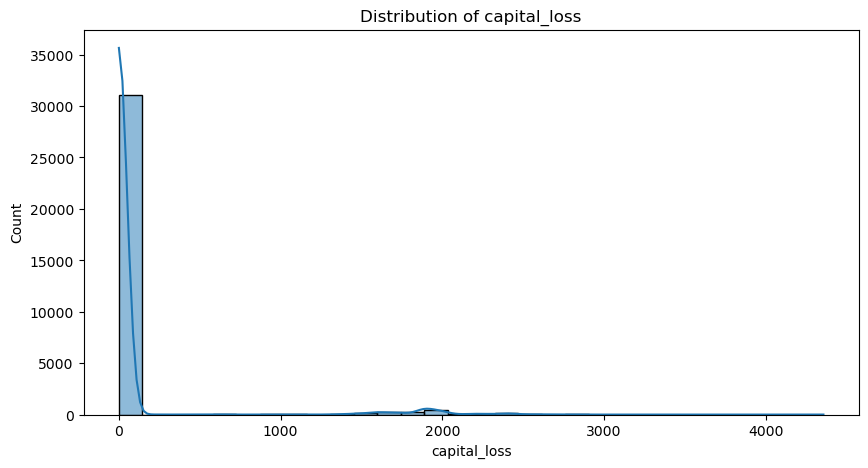

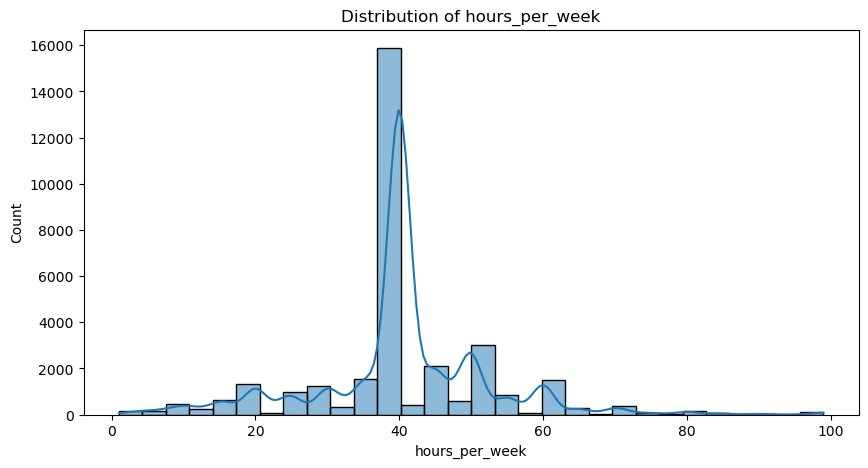

In [28]:
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df_num, x=col, bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

### 3) Qualité des données
---

- ### Identification des valeurs manquantes et explication de comment elles sont codées.

***Les variables `workclass`, `occupation` et `native_country` contiennent certaines valeurs manquantes, représentées par le symbole `?`***

In [35]:
# nombre de valeurs manquantes par colonne
missing_values = df[(df['workclass'] == ' ?') | (df['occupation'] == ' ?') | (df['native_country'] == ' ?')]
print(missing_values.isin([' ?']).sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


- ### Analyser leur impact potentiel sur l’apprentissage.
---

Bien que le nombre total de valeurs manquantes reste relativement limité au regard de la taille du dataset (32 561 observations), leur présence peut néanmoins affecter les performances des modèles d’apprentissage automatique si elles ne sont pas correctement traitées. En particulier :

- la suppression brute des observations concernées pourrait entraîner une perte d’information non négligeable ;

- une mauvaise gestion des valeurs manquantes pourrait introduire un biais dans l’apprentissage ;

- certains algorithmes ne pouvant pas gérer les valeurs manquantes échoueront lors de l’entraînement.

Il est donc nécessaire d’appliquer une stratégie de traitement adaptée, telle que l’imputation par la modalité la plus fréquente ou par des méthodes plus avancées, afin de garantir un apprentissage robuste.

- ### Détecter des valeurs aberrantes (outliers) sur les variables numériques.
---

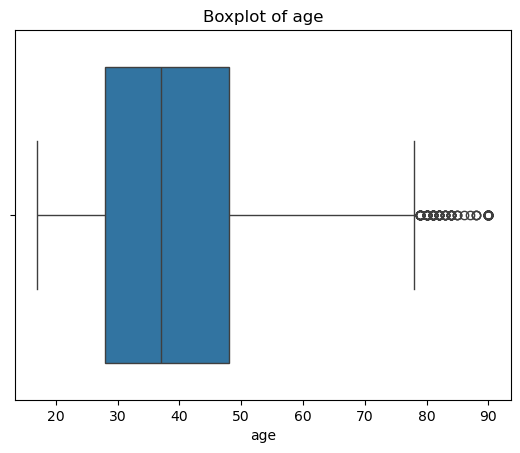

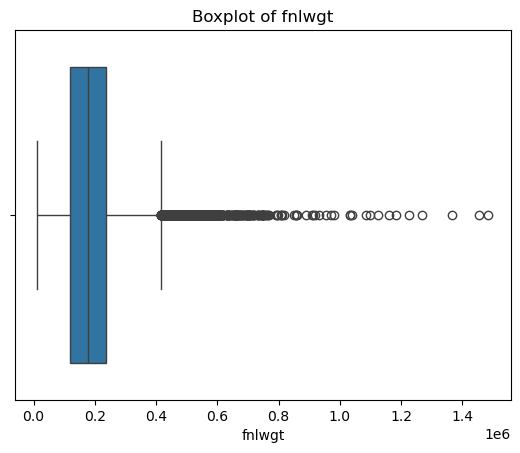

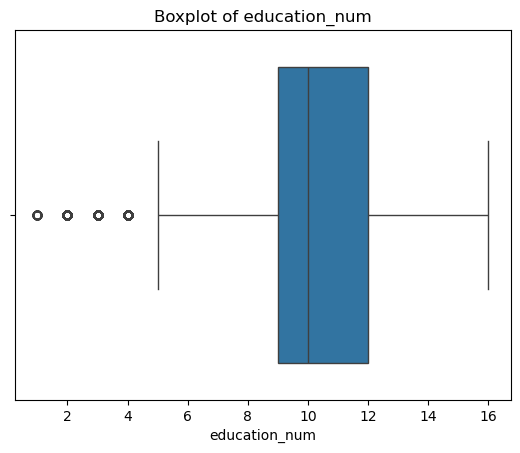

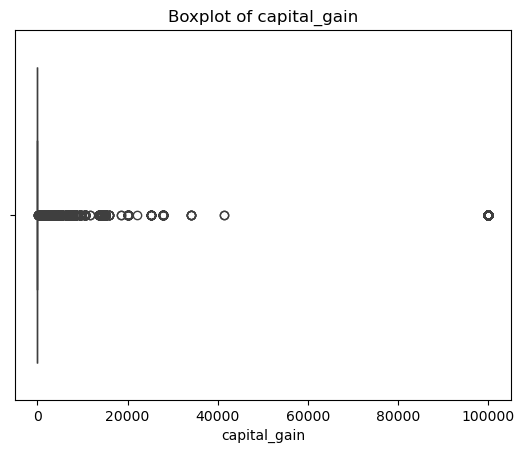

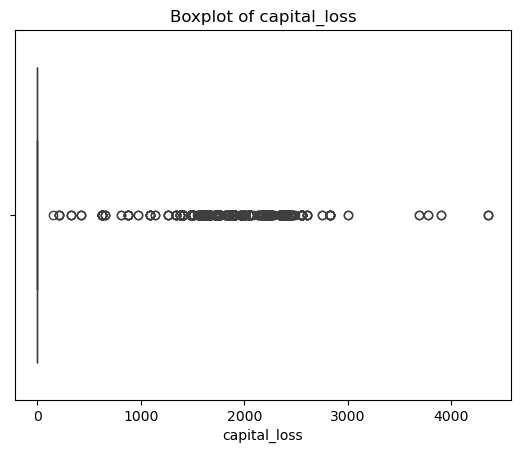

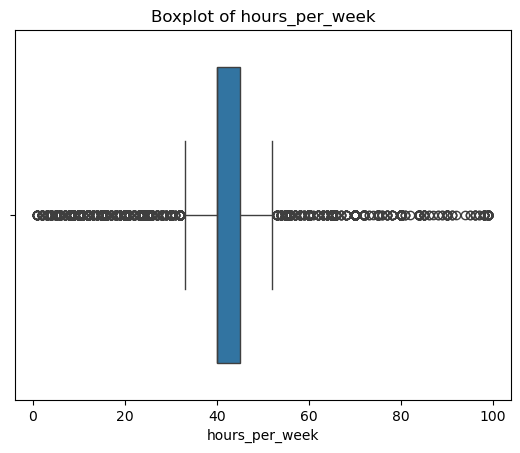

In [36]:
for col in num_cols:
    plt.figure()
    sns.boxplot(data=df_num, x=col) 
    plt.title(f'Boxplot of {col}')
    plt.show()

In [67]:
outliers = {}

for col in df_num.columns:
    Q1 = df_num[col].quantile(0.25)
    Q3 = df_num[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers[col] = df_num[(df_num[col] < lower) | (df_num[col] > upper)].shape[0]

outliers


{'age': 143,
 'fnlwgt': 992,
 'education_num': 1198,
 'capital_gain': 2712,
 'capital_loss': 1519,
 'hours_per_week': 9008}

***Interprétation des outliers détectés (méthode IQR)***

La détection des valeurs aberrantes à l’aide de la méthode de l’écart interquartile (IQR) met en évidence la présence d’outliers dans plusieurs variables numériques :

- `age` : 143 valeurs aberrantes
→ individus très jeunes ou très âgés par rapport à la majorité de la population active.
- `fnlwgt` : 992 valeurs aberrantes
→ poids d’échantillonnage extrêmes, fréquents dans les données de recensement.
- `education_num` : 1 198 valeurs aberrantes
→ niveaux d’éducation très faibles ou très élevés par rapport à la distribution centrale.
- `capital_gain` : 2 712 valeurs aberrantes
→ forts gains en capital, souvent rares mais réalistes économiquement.
- `capital_loss` : 1 519 valeurs aberrantes
→ pertes en capital élevées, peu fréquentes mais informatives.
- `hours_per_week` : 9 008 valeurs aberrantes
→ individus travaillant un nombre d’heures très supérieur à la médiane (ex. > 40h).

La méthode IQR met en évidence un nombre important de valeurs extrêmes, notamment pour les variables `capital_gain`, `capital_loss` et `hours_per_week`. Toutefois, ces valeurs correspondent à des situations économiques réelles et ont été conservées. Des transformations adaptées ont été appliquées afin de limiter leur influence sur l’apprentissage des modèles.

- #### Justification des méthodes de détection utilisées.
---

La détection des valeurs aberrantes a été réalisée à l’aide de méthodes statistiques et graphiques complémentaires, afin d’obtenir une analyse fiable et robuste des distributions des variables numériques.

- Dans un premier temps, des visualisations par boxplots ont été utilisées. Cette approche permet une détection visuelle rapide des valeurs extrêmes et offre une première compréhension de la dispersion, de l’asymétrie et de la présence éventuelle de points atypiques dans les distributions. Les boxplots sont particulièrement adaptés lors de l’analyse exploratoire initiale.

- Dans un second temps, la méthode de l’écart interquartile (IQR) a été appliquée. Cette méthode repose sur des statistiques robustes (quartiles) et ne suppose pas une distribution normale des données, ce qui la rend particulièrement adaptée au jeu de données Adult, dont plusieurs variables (notamment capital_gain et capital_loss) présentent des distributions fortement asymétriques. Les valeurs situées en dehors des bornes définies ont été considérées comme des valeurs aberrantes potentielles.

- La combinaison de ces deux approches permet de croiser l’analyse visuelle et quantitative, réduisant ainsi le risque de détection erronée d’outliers et renforçant la fiabilité de l’analyse.

Enfin, il est important de souligner que les valeurs aberrantes identifiées dans ce dataset correspondent majoritairement à des situations réelles et économiquement plausibles. Elles n’ont donc pas été supprimées automatiquement, mais prises en compte lors du prétraitement à travers des transformations adaptées afin de limiter leur impact sur l’apprentissage des modèles.

### 4) Préparation des données pour le ML
---

- ####  Traitement les valeurs manquantes (imputation).
---

In [68]:
for col in ['workclass', 'occupation', 'native_country']:
    X[col] = X[col].replace(' ?', X[col].mode()[0])

- #### Encoder les variables catégorielles :
---

In [69]:
#rappel
# y = df['income']
# X = df.drop('income', axis=1)

col_cat_X = X.select_dtypes(include=['object']).columns.tolist()
X_cat = X[col_cat_X].copy()
X_cat.head()


,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


- La variable `education` représente la seule variable ordinale du jeu de données. La variable `education_num` correspond à son encodage numérique. Afin d’éviter une redondance d’information et de simplifier l’apprentissage des modèles, seule la variable `education_num` est conservée, tandis que la variable `education` est supprimée.

- Les variables `workclass`, `marital_status`, `occupation`, `relationship`, `race` et `native_country` sont des variables nominales. Leur traitement dépend du modèle utilisé. Certaines variables, notamment `marital_status` et `relationship`, véhiculent des informations proches et peuvent être corrélées. Conserver ces deux variables peut introduire une redondance d’information dans le cadre d’une `régression logistique`, tandis que cette redondance est moins problématique pour des modèles comme le `KNN` ou les `arbres de décision`, qui sont moins sensibles à la colinéarité.

In [70]:
# encodage de la variable cible
y = y.replace({' <=50K': 0, ' >50K': 1})
y.value_counts()

income
0    24720
1     7841
Name: count, dtype: int64

In [71]:
#Suprression de la colonne education
X_proccess = X.drop(['education'], axis=1).copy()
X_proccess.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [72]:
cat_cols_X_proccess = X_proccess.select_dtypes(include=['object']).columns.tolist()
cat_cols_X_proccess

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

La variable `fnlwgt`, correspondant à un poids d’échantillonnage du recensement, ne représente pas une caractéristique individuelle. Elle a donc été exclue des variables explicatives afin d’éviter l’introduction de bruit et d’améliorer la robustesse du modèle de régression logistique.

In [ ]:
# suppression de la variable fnlwgt
X_proccess = X_proccess.drop(['fnlwgt'], axis=1)

In [86]:

num_cols_X_proccess = X_proccess.select_dtypes(include=['number']).columns.tolist()
num_cols_X_proccess

['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

In [88]:
# One-Hot Encoding des variables nominales
X_final = pd.get_dummies(X_proccess, columns=cat_cols_X_proccess, drop_first=True).copy()
X_final.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,13,2174,0,40,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,13,0,0,13,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,38,9,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,7,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,13,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


- ***Les variables catégorielles nominales et binaires ont été encodées à l’aide du One-Hot Encoding afin d’éviter l’introduction d’un ordre artificiel.***

- #### Mettre à l’échelle les variables numériques (standardisation).
---

In [96]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
x_train_saled = scaler.fit_transform(X_train)
x_test_saled = scaler.transform(X_test)

- ***les variables numériques ont été standardisées pour améliorer la convergence du modèle de régression logistique.***

### 5) Préparation finale
___

- #### Séparer les données en X (variables explicatives) et y (variable cible).
---

In [94]:
#rappel
# y = df['income']
# X = df.drop('income', axis=1)
# encodage de la variable cible
# y = y.replace({' <=50K': 0, ' >50K': 1})

- #### Mettre en place une séparation train / test.
___

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

Le data leakage correspond à l’utilisation involontaire d’informations issues du jeu de test lors de l’entraînement du modèle, ce qui conduit à une surestimation des performances. Afin d’éviter ce phénomène, la séparation entre les jeux d’entraînement et de test a été réalisée avant toute transformation des données, et l’ensemble des étapes de prétraitement a été appris exclusivement sur le jeu d’entraînement.

### 6) Classification supervisée
___

- #### Régression logistique
___

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(x_train_saled, y_train)

y_pred = model.predict(x_test_saled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8547520343927529
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      4942
           1       0.74      0.61      0.67      1571

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.85      0.85      6513

Confusion Matrix:
 [[4604  338]
 [ 608  963]]


___
**Performances**
___
- Accuracy : 0.85
- F1-score (classe >50K) : 0.67
- Recall (classe >50K) : 0.61
___
**Matrice de confusion**
___
Faux négatifs : 608
Faux positifs : 338
___
**Interprétation**

- Le modèle est très performant pour la classe majoritaire (≤50K)
- Il manque encore 39 % des individus gagnant réellement >50K
- Bon compromis stabilité / interprétabilité
- Coefficients exploitables pour analyse socio-économique
___
***Modèle robuste mais conservateur sur la classe minoritaire.***

----
- #### k plus proches voisins (KNN)
___

In [103]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train_saled, y_train)

y_pred_knn = knn.predict(x_test_saled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


KNN Accuracy: 0.8349454936281283
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      4942
           1       0.69      0.58      0.63      1571

    accuracy                           0.83      6513
   macro avg       0.78      0.75      0.76      6513
weighted avg       0.83      0.83      0.83      6513

Confusion Matrix:
 [[4520  422]
 [ 653  918]]


___
**Performances**
___
- Accuracy : 0.83
- F1-score (>50K) : 0.63
- Recall (>50K) : 0.58
___
**Matrice de confusion**
- Faux négatifs : 653
- Faux positifs : 422
___
**Interprétation**
___
- Le modèle est sensiblement moins performant
- Très sensible :
 - au déséquilibre des classes
 - au choix de k
 - à la dimensionnalité élevée (après encodage)
 ___
***KNN ne généralise pas bien dans ce contexte.***

---
- ### Arbre de décision
___

In [105]:
from sklearn.tree import DecisionTreeClassifier

# Modèle Arbre de décision
dt = DecisionTreeClassifier(
    max_depth=10,
    random_state=42
)

# Entraînement
dt.fit(x_train_saled, y_train)

# Prédictions
y_pred_dt = dt.predict(x_test_saled)

# Évaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8578228159066482
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      4942
           1       0.77      0.59      0.67      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513

Confusion Matrix:
 [[4666  276]
 [ 650  921]]


___
**Performances**
___
- Accuracy : 0.86 (meilleure)
- F1-score (>50K) : 0.67
- Precision (>50K) : 0.77
___
**Matrice de confusion**
___
- Faux négatifs : 650
- Faux positifs : 276 (meilleur score)
___
**Interprétation**
___
- Meilleure capacité à éviter les faux positifs
- Performance globale légèrement supérieure
- Modèle plus flexible que la régression
- ⚠️ Risque de sur-apprentissage (surtout sans pruning fin)
___
***Très bon compromis performance / interprétation.***

___
- #### Stockage des métriques pour comparaison
___

In [106]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "KNN", "Decision Tree"],
    "Accuracy": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_dt)
    ],
    "Precision": [
        classification_report(y_test, y_pred, output_dict=True)["1"]["precision"],
        classification_report(y_test, y_pred_knn, output_dict=True)["1"]["precision"],
        classification_report(y_test, y_pred_dt, output_dict=True)["1"]["precision"]
    ],
    "Recall": [
        classification_report(y_test, y_pred, output_dict=True)["1"]["recall"],
        classification_report(y_test, y_pred_knn, output_dict=True)["1"]["recall"],
        classification_report(y_test, y_pred_dt, output_dict=True)["1"]["recall"]
    ],
    "F1-score": [
        classification_report(y_test, y_pred, output_dict=True)["1"]["f1-score"],
        classification_report(y_test, y_pred_knn, output_dict=True)["1"]["f1-score"],
        classification_report(y_test, y_pred_dt, output_dict=True)["1"]["f1-score"]
    ]
})

results


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.854752,0.740200,0.612985,0.670613
1,KNN,0.834945,0.685075,0.584341,0.630711
2,Decision Tree,0.857823,0.769424,0.586251,0.665462


___
- #### Visualisation comparative des modèles
___

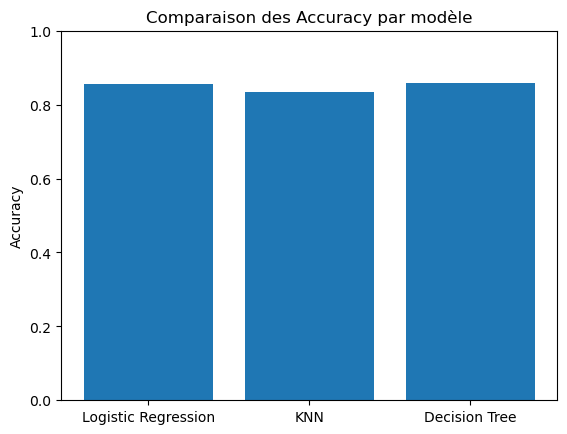

In [107]:
plt.figure()
plt.bar(results["Model"], results["Accuracy"])
plt.title("Comparaison des Accuracy par modèle")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


___
- #### Precision / Recall / F1-score
___

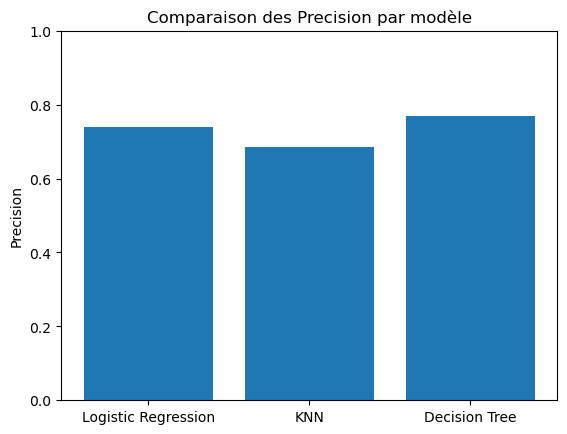

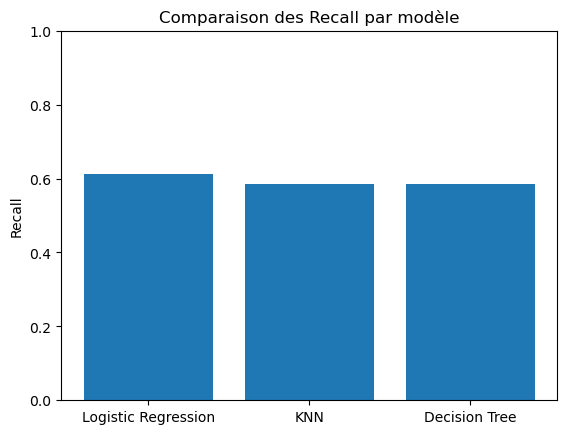

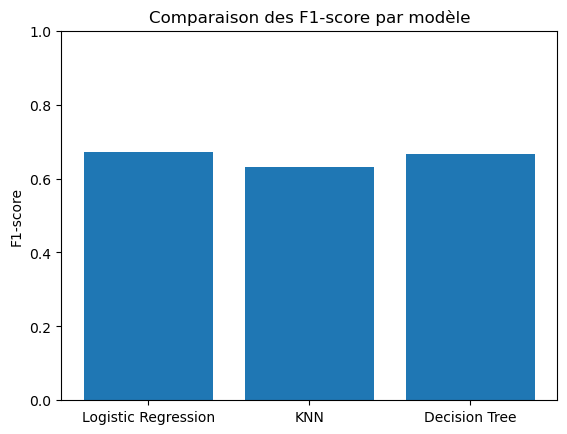

In [108]:
metrics = ["Precision", "Recall", "F1-score"]

for metric in metrics:
    plt.figure()
    plt.bar(results["Model"], results[metric])
    plt.title(f"Comparaison des {metric} par modèle")
    plt.ylabel(metric)
    plt.ylim(0, 1)
    plt.show()


___
- #### Matrices de confusion (visuel)
___

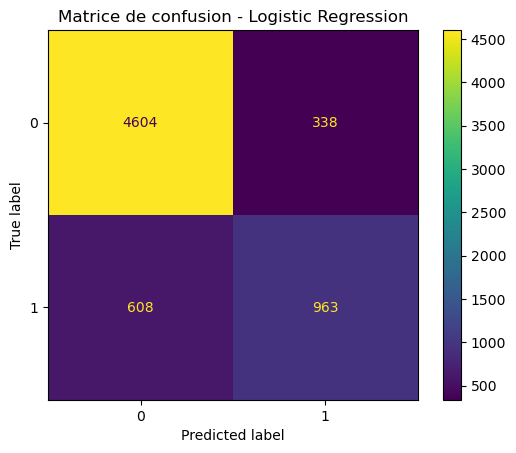

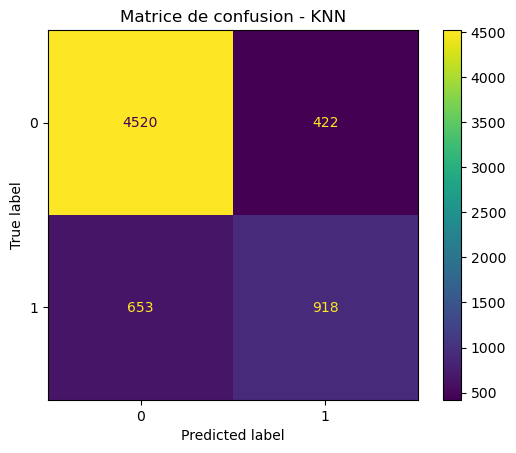

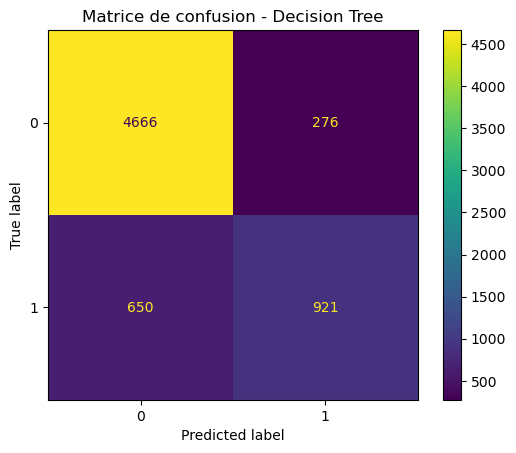

In [109]:
from sklearn.metrics import ConfusionMatrixDisplay

models_preds = {
    "Logistic Regression": y_pred,
    "KNN": y_pred_knn,
    "Decision Tree": y_pred_dt
}

for model_name, preds in models_preds.items():
    disp = ConfusionMatrixDisplay(
        confusion_matrix=confusion_matrix(y_test, preds)
    )
    disp.plot()
    plt.title(f"Matrice de confusion - {model_name}")
    plt.show()


### Meilleur modèle selon l’objectif :
- Interprétation & stabilité → Régression logistique
- Performance brute → Arbre de décision
- KNN → ❌ moins adapté ici

**Discussion des différences de performance**
- Le déséquilibre des classes pénalise surtout KNN
- La régression logistique reste limitée par sa frontière linéaire
- L’arbre capte des interactions non linéaires
- Le rappel de la classe >50K reste globalement faible pour tous les modèles
___
**Limites du travail**

- Déséquilibre des classes non traité
- Hyperparamètres peu optimisés
- Pas de validation croisée
- Pas d’analyse d’équité (genre, race)
___
**Pistes d’amélioration (sans implémentation)**
- Rééquilibrage des classes (SMOTE, class_weight)
- Optimisation des hyperparamètres (GridSearchCV)
- Feature selection / réduction dimensionnelle
- Modèles plus avancés (Random Forest, XGBoost)
- Analyse des biais algorithmiques
___
**Conclusion**
___
L’arbre de décision obtient les meilleures performances globales, tandis que la régression logistique offre une meilleure interprétabilité. Le KNN, bien que simple, s’avère moins adapté à ce jeu de données caractérisé par une forte dimensionnalité et un déséquilibre de classes.